In [25]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import scipy as ss
from scipy import stats
import numpy as np

In [59]:
df = pd.read_hdf(rep_path + '500_rep_z_score')

In [64]:
df

replicability  resolution  percentile    z_score
0                    0         500          90 -23.235368
1                    0         500          90 -23.235368
2                    0         500          90 -23.235368
3                    0         500          90 -23.235368
4                    0         500          90 -23.235368
...                ...         ...         ...        ...
4459586              0         500          90 -23.235368
4459587              0         500          90 -23.235368
4459588              0         500          90 -23.235368
4459589              0         500          90 -23.235368
4459590              0         500          90 -23.235368

[4459591 rows x 4 columns]

In [30]:
df_replicability = []
df_percentile = []
rep_path ='/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/gene_by_gene_aggregate/'

#for resolution in [10, 40, 100, 500]:
#    for percentile in [99, 90, 80, 50, 30, 10]:
for resolution in [500]:
    for percentile in [90]:
        if resolution == 10:
            ice = 'KR_per_chr_ranked'
        else:
            ice = 'intra_KR_per_chr_ranked'
        hic = hm.hiCMatrix(rep_path + f'{resolution}kbp_raw_genome_wide_{ice}_gene_by_gene_tss_thresholded_{percentile}_agg.h5')
        chrom = 'chr19'
        gene_chr = hic.matrix[hic.getChrBinRange(chrom)[0]:hic.getChrBinRange(chrom)[1], hic.getChrBinRange(chrom)[0]:hic.getChrBinRange(chrom)[1]]
        ss_matrix = gene_chr.astype('int8')
        full_matrix = ss_matrix.toarray()
        #print (matrix_genome_wide.data)
        df = pd.DataFrame(data=full_matrix[np.triu_indices(full_matrix.shape[0], k=1)],  columns=["replicability"])
        df['resolution'] = resolution
        df['percentile'] = percentile
        df_replicability.append(df)

In [31]:
df_rep=pd.concat(df_replicability)

In [32]:
df_rep

replicability  resolution  percentile
0                    0         500          90
1                    0         500          90
2                    0         500          90
3                    0         500          90
4                    0         500          90
...                ...         ...         ...
4459586              0         500          90
4459587              0         500          90
4459588              0         500          90
4459589              0         500          90
4459590              0         500          90

[4459591 rows x 3 columns]

In [77]:
def z_score_calc(x, probablity_of_success):
    h=3
    return stats.norm.ppf(stats.binom_test(x, n=119, p=probablity_of_success, alternative='less')) 

def np_vec_impl(df, probablity_of_success):
    h=3
    return np.vectorize(z_score_calc)(df['replicability'], probablity_of_success)


In [67]:
def z_score_calc(x):
    h=3
    return stats.norm.ppf(stats.binom_test(x, n=119, p=0.1, alternative='less')) 


In [68]:
def np_vec_impl(df):
    h=3
    return np.vectorize(z_score_calc)(df['replicability'])

In [69]:
dt = df_rep.head(10000)

In [79]:
dt

replicability  resolution  percentile    z_score
0                 0         500          90 -23.235368
1                 0         500          90 -23.235368
2                 0         500          90 -23.235368
3                 0         500          90 -23.235368
4                 0         500          90 -23.235368
...             ...         ...         ...        ...
9995             16         500          90 -19.504041
9996             16         500          90 -19.504041
9997             16         500          90 -19.504041
9998             16         500          90 -19.504041
9999             16         500          90 -19.504041

[10000 rows x 4 columns]

In [81]:
probablity_of_success = 1- (percentile*1.0) / 100

In [80]:
probablity_of_success

0.9

In [78]:
dt['z_score'] = np_vec_impl(dt, probablity_of_success)

<ipython-input-78-4a717e6ef70d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['z_score'] = np_vec_impl(dt, probablity_of_success)


<AxesSubplot:xlabel='resolution', ylabel='replicability'>

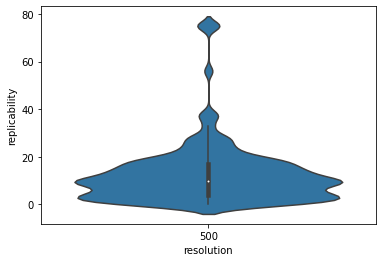

In [57]:
import seaborn as sns
sns.violinplot(data=df, y='replicability', x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='z_score'>

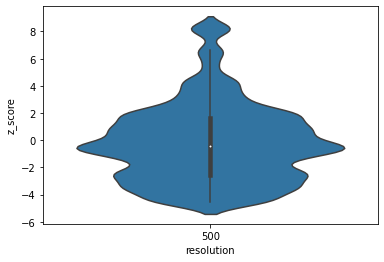

In [58]:
import seaborn as sns
sns.violinplot(data=dt, y='z_score', x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='z_score'>

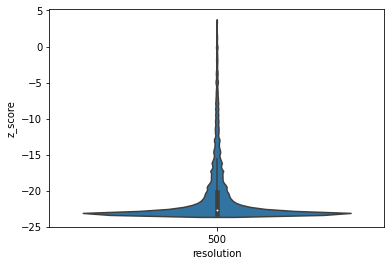

In [62]:
import seaborn as sns
sns.violinplot(data=df, y='z_score', x='resolution')

In [82]:
probablity_of_success = 1- ((percentile*1.0) / 100)

In [ ]:
df_replicability = []
df_percentile = []
rep_path='/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/gene_by_gene_aggregate/'

for resolution in [40, 100, 10]:
    hic = hm.hiCMatrix(rep_path + f'{resolution}kbp_raw_genome_wide_gene_by_gene_aggregate_119.h5')
    chrom = 'chr3'
    gene_chr = hic.matrix[hic.getChrBinRange(chrom)[0]:hic.getChrBinRange(chrom)[1], hic.getChrBinRange(chrom)[0]:hic.getChrBinRange(chrom)[1]]
    ss_matrix = gene_chr.astype('int8')
    full_matrix = ss_matrix.toarray()
    df = pd.DataFrame(data=full_matrix.flatten(),  columns=["replicability"])
    df['resolution'] = resolution
    df_replicability.append(df)
    for percentile in [99, 90, 80, 50, 30, 10, 0]:
        agg_path='/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/119_all_bootstrap_1_intra/'
        agg_hic = hm.hiCMatrix(agg_path + f'{resolution}kbp_raw_genome_wide_intra_KR_per_chr_ranked_gene_by_gene_tss_thresholded_{percentile}.h5')
        chrom = 'chr3'
        agg_gene_chr = agg_hic.matrix[agg_hic.getChrBinRange(chrom)[0]:agg_hic.getChrBinRange(chrom)[1], agg_hic.getChrBinRange(chrom)[0]:agg_hic.getChrBinRange(chrom)[1]]
        index_x = sparse.coo_matrix(agg_gene_chr).row
        index_y = sparse.coo_matrix(agg_gene_chr).col
        thresholded_gene_chr = full_matrix[index_x,index_y]
        df = pd.DataFrame(data=thresholded_gene_chr,  columns=["replicability_at_thresh"])
        df['resolution'] = resolution
        df['percentile'] = percentile
        df_percentile.append(df)